In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
Z=pd.read_csv('./Training/Diabetes_XTrain.csv')
X=pd.read_csv('./Training/Diabetes_XTrain.csv').values
Y=pd.read_csv('./Training/Diabetes_YTrain.csv').values
X_Test=pd.read_csv('./Testing/Diabetes_Xtest.csv').values

In [55]:
X.shape

(576, 8)

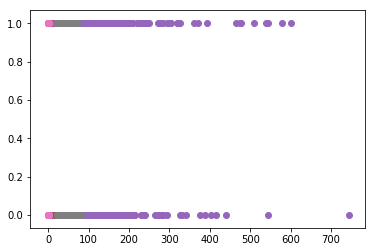

In [56]:
for i in range(8):
    plt.scatter(X[:,i],Y)


In [57]:
print(X[:,0].shape,Y.shape)

(576,) (576, 1)


In [58]:
def Distance(p1,p2):
    return (np.sum((p1-p2))**2)**0.5

In [59]:
def KNN(X,Y,Test,k=13):
    d=[]
    for i in range(X.shape[0]):
        val=Distance(X[i],Test)
        d.append((val,Y[i]))
    d=np.array(sorted(d))
    d=d[:k]
    c=np.unique(d,return_counts=True)
    t=np.argmax(c[1])#Returns the address of maximum xounted value
    pred=c[0][t]
    #print(t,c[1],pred)
    return pred

In [60]:
PRED=[]
for i in range(X_Test.shape[0]):
    out=KNN(X,Y,X_Test[i])
    PRED.append(out)

In [61]:
PRED=np.array(PRED)

In [62]:
import csv
with open('./mycsv_Diabetes.csv','w',newline='')as f:
    fieldnames=['Outcome']
    thewriter=csv.DictWriter(f,fieldnames=fieldnames)
    thewriter.writeheader()
    for i in range(PRED.shape[0]):
        thewriter.writerow({'Outcome':PRED[i]})

In [63]:
PRED

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [115]:
import sklearn

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn=KNeighborsClassifier(n_neighbors=5)
Y=Y.reshape(-1)

In [125]:
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [126]:
Y=Y.reshape(Y.shape[0])

In [127]:
Y_test=knn.predict(X_Test)

In [128]:
knn.score(X_Test,Y_test)

1.0

In [129]:
import csv
with open('./mycsv_Diabetes.csv','w',newline='')as f:
    fieldnames=['Outcome']
    thewriter=csv.DictWriter(f,fieldnames=fieldnames)
    thewriter.writeheader()
    for i in range(Y_test.shape[0]):
        thewriter.writerow({'Outcome':Y_test[i]})

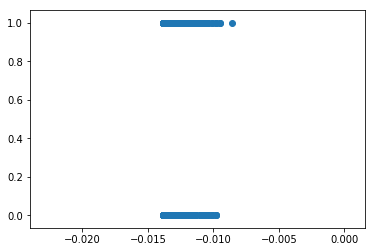

In [123]:
plt.scatter(X[:,0],Y)


In [110]:
mean=np.mean(X)

In [111]:
mean

44.29821072048611

In [112]:
var=np.var(X)

In [113]:
X=(X-mean)/var

In [114]:
X

array([[-0.01168359,  0.03874935,  0.0136895 , ..., -0.00191025,
        -0.0136298 , -0.00134641],
       [-0.01137035,  0.02058096,  0.00993052, ..., -0.00516803,
        -0.01380209,  0.00429206],
       [-0.01168359,  0.03217114,  0.00993052, ..., -0.00153436,
        -0.01379583, -0.00040666],
       ...,
       [-0.01324983,  0.02433994,  0.00491856, ..., -0.00454154,
        -0.01365173, -0.00698487],
       [-0.01262334,  0.03436388,  0.00867753, ..., -0.00407166,
        -0.01377045, -0.00228615],
       [-0.01356308,  0.0136895 ,  0.01055702, ..., -0.00385239,
        -0.01376199, -0.00479214]])